In [1]:
import pandas as pd
import scipy.stats.qmc
import numpy as np

from gumps.solvers.regressors.regression_solver import RegressionParameters

from gumps.solvers.pca import PCA, PCASettings
from gumps.solvers.kernel_pca import KernelPCA, KernelPCASettings

%matplotlib inline

Create synthetic data

In [2]:
def generate_synthetic_input(num_points) -> pd.DataFrame:
    input_data = pd.DataFrame(scipy.stats.qmc.Sobol(5).random(num_points), columns=["a", "b", "c", "d", "e"])
    input_data['ab'] = input_data['a'] + 2 * input_data['b']
    input_data['ac'] = input_data['a'] - input_data['c']
    input_data['bd'] = input_data['b'] + 1.5 * input_data['d']
    input_data['ce'] = input_data['c'] - 2 * input_data['e']
    input_data.insert(0, 'ae', input_data['a'] - input_data['e'])
    return input_data

def generate_synthetic_output(input_data) -> pd.DataFrame:
    output_data = pd.DataFrame()
    output_data["f"] = input_data["a"] + input_data["b"] + input_data["c"] + input_data["d"] + input_data["e"]
    output_data["g"] = input_data["a"] ** 3 + input_data["b"] ** 2 + input_data["c"] * input_data["d"] ** 2 + input_data["e"]
    output_data["h"] = input_data["a"] ** 2 + input_data["b"] ** 2 + input_data["c"] ** 2 + input_data["d"] ** 2 + input_data["e"] ** 2
    return output_data

def add_noise(output_data):
    output_data = output_data.copy()
    output_data["f"] *= np.random.normal(1, 0.05, len(output_data))
    output_data["g"] *= np.random.normal(1, 0.05, len(output_data))
    output_data["h"] *= np.random.normal(1, 0.05, len(output_data))
    return output_data


input_data = generate_synthetic_input(512)
output_data = generate_synthetic_output(input_data)
noisy_output_data = add_noise(output_data)

reg_data = RegressionParameters(input_data=input_data, output_data=noisy_output_data)

Create a PCA settings object, and set the number of components to 6

In [3]:
pca_settings = PCASettings(input_data = reg_data.input_data, n_components=6)

Fit the PCA

In [4]:
pca = PCA(pca_settings)
pca.fit()

Create a covariance plot

<Axes: >

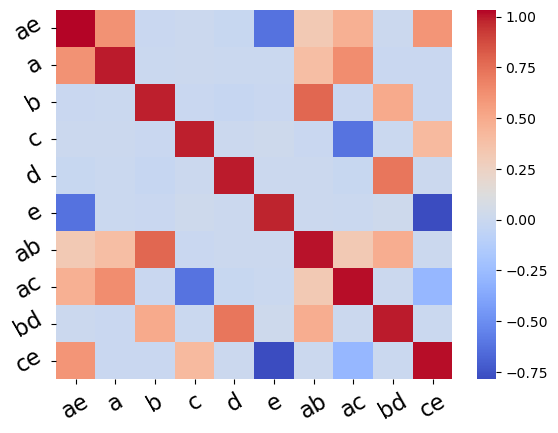

In [5]:
pca.get_covariance_plot()

Get the vectors for each principal component

In [6]:
pca.get_principal_components()

,PC0,PC1,PC2,PC3,PC4,PC5
ae,-0.511615,0.288358,0.146793,-0.072972,-0.082051,0.339847
a,-0.403776,-0.064910,0.288466,0.019411,-0.541164,-0.574221
b,-0.252043,-0.275060,-0.355369,0.433259,0.268413,-0.384003
c,0.076429,0.278525,-0.353311,0.244818,-0.643167,0.103400
d,-0.085184,-0.159169,-0.331052,-0.687248,-0.165818,-0.177215
e,0.287734,-0.455410,0.068479,0.125074,-0.422415,0.397562
ab,-0.428590,-0.281142,-0.193494,0.372180,-0.008548,0.285425
ac,-0.356886,-0.244223,0.458976,-0.150243,0.062183,0.251229
bd,-0.226166,-0.297309,-0.476196,-0.312331,0.007700,0.198064
ce,-0.231503,0.547348,-0.234472,-0.007415,0.069076,0.152809


Get the explained variance for use principal component

In [7]:
pca.get_explained_variance()

,Explained Variance Ratio
PC0,0.272656
PC1,0.231921
PC2,0.205427
PC3,0.132684
PC4,0.102476
PC5,0.017188


Create plots for the explained variance for each principle component

<Axes: >

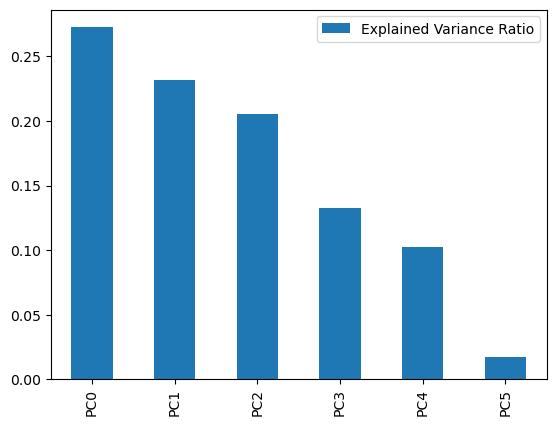

In [8]:
pca.get_explained_variance_plot()

Create and fit a KernelPCA object

In [9]:
kernel_pca_settings = KernelPCASettings(input_data = reg_data.input_data, n_components=8,
                                        kernel="rbf")

kernel_pca = KernelPCA(kernel_pca_settings)
kernel_pca.fit()

Print the eigenvectors for the KernelPCA

In [10]:
kernel_pca.get_principal_components()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.115772,-0.086537,-0.080270,0.019784,0.101728,0.029623,-0.091501,0.044988
1,-0.035151,-0.000684,-0.005876,0.001219,0.000831,-0.034089,-0.005924,-0.003148
2,0.008694,0.010624,-0.024269,-0.006719,0.004315,-0.011360,-0.038660,0.034602
3,-0.006426,0.051791,0.091421,0.054040,0.039464,0.093101,0.115795,-0.025169
4,0.044562,-0.022083,-0.034683,0.081326,-0.021349,-0.066947,0.040718,-0.082312
...,...,...,...,...,...,...,...,...
507,-0.022997,0.009543,0.013218,0.010819,0.041576,0.013939,0.030883,0.006173
508,0.062984,-0.139984,-0.032018,-0.094859,-0.019773,0.127948,0.123366,0.026597
509,-0.022817,0.001137,-0.013914,0.003852,-0.001835,-0.006029,0.005689,0.001103
510,0.022254,0.020336,0.037267,-0.140906,0.019658,-0.140989,0.013073,-0.062990


Get the explained variance for each kernel principal component

In [11]:
kernel_pca.get_explained_variance()

,Explained Variance Ratio
PC0,0.151825
PC1,0.149868
PC2,0.136628
PC3,0.132315
PC4,0.117435
PC5,0.111592
PC6,0.101744
PC7,0.098593


Create a plot of the explained variance for each principle component

<Axes: >

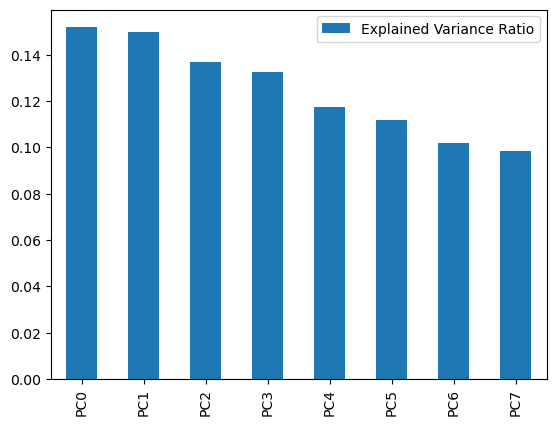

In [12]:
kernel_pca.get_explained_variance_plot()